# Problem Statement: -

2. In California, annual forest fires can cause huge loss of wildlife, human life, and can cost billions of dollars in property damage. Local officials would like to predict the size of the burnt area in forest fires annually so that they can be better prepared in future calamities. 
Build a Support Vector Machines algorithm on the dataset and share your insights on it in the documentation. 
Note: - Size_ category is the output variable.

# 🔷 Business Objective:- 

To help California local officials predict the size of the burnt area in annual forest fires using the Support Vector Machines (SVM) algorithm.
Accurate predictions will enable better resource planning, early warning systems, and effective disaster management to minimize loss of life, wildlife, and property.



# 🔶 Business Constraints:-

1. Time-Sensitive – Predictions must be timely for disaster preparedness.
2. Data Availability – Accuracy depends on quality and completeness of historical fire data.
3. Cost Constraint – Must work within allocated budget for analytics and system deployment.
4. Model Simplicity – Outputs should be easy for officials to interpret and act upon.
5. Regulatory Compliance – Must ensure proper handling of sensitive geographical and environmental data.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("forestfires.csv")
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


# Data Exploration:-

In [3]:
df.shape

(517, 31)

In [4]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

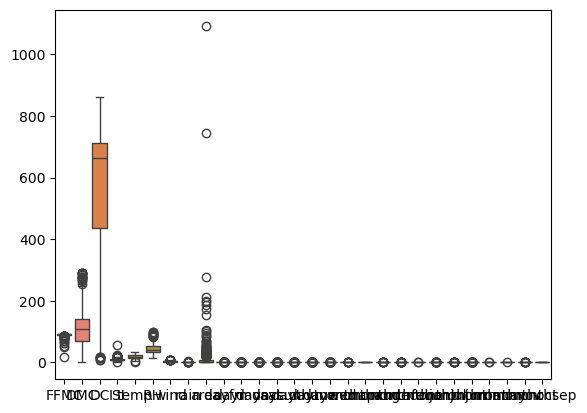

In [5]:
sns.boxplot(df)
plt.show()

In [6]:
# First, select only the numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Apply IQR method for each numeric column
for column in numeric_df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    df
    

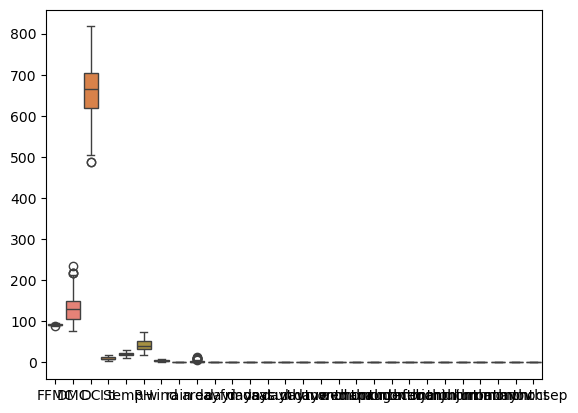

In [7]:
sns.boxplot(df)
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, 5 to 490
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          106 non-null    object 
 1   day            106 non-null    object 
 2   FFMC           106 non-null    float64
 3   DMC            106 non-null    float64
 4   DC             106 non-null    float64
 5   ISI            106 non-null    float64
 6   temp           106 non-null    float64
 7   RH             106 non-null    int64  
 8   wind           106 non-null    float64
 9   rain           106 non-null    float64
 10  area           106 non-null    float64
 11  dayfri         106 non-null    int64  
 12  daymon         106 non-null    int64  
 13  daysat         106 non-null    int64  
 14  daysun         106 non-null    int64  
 15  daythu         106 non-null    int64  
 16  daytue         106 non-null    int64  
 17  daywed         106 non-null    int64  
 18  monthapr       

In [9]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.0,106.000000,106.0,...,106.0,106.0,106.0,106.0,106.0,106.0,106.0,106.0,106.0,106.000000
mean,92.202830,130.354717,665.408491,10.645283,20.975472,42.254717,3.869811,0.0,1.919623,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.367925
std,1.770954,35.681662,66.709653,3.859438,3.941351,13.273003,1.620944,0.0,3.094616,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.484532
min,87.900000,75.600000,488.000000,3.700000,10.400000,19.000000,0.400000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,91.025000,105.800000,618.675000,7.600000,18.200000,33.000000,2.700000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,92.100000,129.500000,664.500000,9.600000,20.800000,40.000000,4.000000,0.0,0.045000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,93.100000,149.300000,703.475000,13.800000,23.875000,51.750000,5.400000,0.0,2.697500,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
max,96.000000,235.100000,817.500000,18.000000,31.000000,75.000000,7.600000,0.0,14.290000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


In [10]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

# Data Preprocessing:-

In [11]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [12]:
categorical_columns=df.select_dtypes(include=['object']).columns
categorical_columns

Index(['month', 'day', 'size_category'], dtype='object')

In [13]:
#Initialize label Encoder
le=LabelEncoder()
le

LabelEncoder()

In [14]:
#Apply Label Encoding to all categorical columns
df['month'] = le.fit_transform(df['month'])
df['day'] = le.fit_transform(df['day'])
df['size_category'] = le.fit_transform(df['size_category'])  # 'small'->0, 'large'->1

In [15]:
# Feature and target separation
X = df.drop(['size_category'], axis=1)
y = df['size_category']

In [16]:
# Normalize features
scaler = StandardScaler()

In [17]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.76294794, -1.03536183,  0.05512929, ...,  0.        ,
         0.        , -0.76294794],
       [ 1.31070543,  0.17066404, -0.68242567, ...,  0.        ,
         0.        ,  1.31070543],
       [ 1.31070543,  1.3766899 ,  0.39553927, ...,  0.        ,
         0.        ,  1.31070543],
       ...,
       [-0.76294794,  0.17066404,  1.64370919, ...,  0.        ,
         0.        , -0.76294794],
       [-0.76294794,  1.3766899 ,  1.64370919, ...,  0.        ,
         0.        , -0.76294794],
       [-0.76294794,  1.3766899 ,  1.64370919, ...,  0.        ,
         0.        , -0.76294794]])

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
import numpy as np
unique, counts = np.unique(y, return_counts=True)
print("Original label distribution:")
print(dict(zip(unique, counts)))


Original label distribution:
{0: 11, 1: 95}


In [20]:
#Split Data
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)


In [21]:
# Train SVM
svm_model = SVC(kernel='rbf')  # you can try 'linear' or 'poly' too
svm_model.fit(X_train, y_train)

SVC()

In [22]:
# Evaluate
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9090909090909091
[[ 1  2]
 [ 0 19]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.90      1.00      0.95        19

    accuracy                           0.91        22
   macro avg       0.95      0.67      0.72        22
weighted avg       0.92      0.91      0.89        22



# Linear Kernel

In [23]:
# Train SVM with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

In [24]:
# Evaluate
results = {
    "Linear Kernel": {
        "Accuracy": accuracy_score(y_test, y_pred_linear),
        "Confusion Matrix": confusion_matrix(y_test, y_pred_linear),
        "Classification Report": classification_report(y_test, y_pred_linear)
    }
}

In [25]:
results

{'Linear Kernel': {'Accuracy': 0.9090909090909091,
  'Confusion Matrix': array([[ 2,  1],
         [ 1, 18]], dtype=int64),
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.67      0.67      0.67         3\n           1       0.95      0.95      0.95        19\n\n    accuracy                           0.91        22\n   macro avg       0.81      0.81      0.81        22\nweighted avg       0.91      0.91      0.91        22\n'}}